<a href="https://colab.research.google.com/github/GyeeunJeong/Hands-on-ML/blob/main/ch4_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 훈련
- 작동 원리를 이해하여 적절한 모델, 작업에 맞는 하이퍼파라미터 찾기
- 디버깅, 에러 분석에 도움
- 순서
1. 선형회귀
  - 훈련 방법
   1. 계산 공식을 사용해 최적의 모델 파라미터 구하기
   2. 경사 하강법이란 반복적인 최적화 방식으로 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화 시킴
2. 다항회귀
  - 비선형 데이터셋 훈련 가능
  - 파라미터가 많아서 훈련 데이터에 과대적합되기 더 쉬움
  - 학습 곡선으로 과대적합 감지, 감소시킬 수 있는 규제 기법 배우기
3. 로지스틱 회귀, 소프트맥스 회기

## 선형 회귀
- 비용 함수 최소화하는 theta 찾기
- 계산공식: 정규방정식
  - $\theta = (X^T \cdot X)^{-1}\cdot X^T\cdot y$
  - 단점: 특성 수에 따라 계산 복잡도가 $O(n^3)$ 정도 
  - 장점: 훈련 세트 샘플 수에는 선형적으로 계산 복잡도 증가(큰 훈련세트도 처리 가능), 예측이 빠름.

In [2]:
import numpy as np

X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

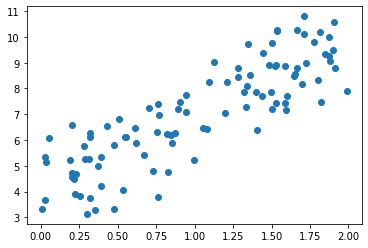

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, y, )

In [4]:
# 정규방정식 이용
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
# 4, 3 이 나와야 하지만 노이즈 때문에 원래 함수 파라미터 정확하게 재현 못함
theta_best

array([[4.15017438],
       [2.82372551]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.15017438],
       [9.7976254 ]])

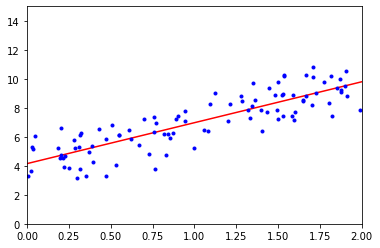

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
# 같은 작업하는 사이킷런
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.15017438]), array([[2.82372551]]))

In [9]:
lin_reg.predict(X_new)

array([[4.15017438],
       [9.7976254 ]])

## 4.2 경사 하강법
- 비용함수를 최소화하기 위해 반복해서 파라미터 조정
- 임의의 값 벡터 $θ$에 대해(random initialization) 비용 함수의 현재 그래디언트 계산, 그래디언트가 감소하는 방향으로 진행, 그래디언트가 0이 되면 최솟값 도달
- step 크기(learning rate) 중요.
- 문제점1: global mimimum을 찾지 못하고 local minimum에 수렴할 수 있음 
- 문제점2: 모든 특성이 같은 스케일을 갖지 않으면 수렴이 오래 걸림
  
1. 배치 경사 하강법
  - 세타가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산 (편도함수)
  - $ \frac{∂}{∂θ_j}MSE(θ)=\frac{2}{m}Σ^m_{i=1}(θ^T ⋅x^{(i)}-y^{(i)})x^{(i)}_j $
  - 배치 경사 하강법: 매 스텝에서 전체 훈련 세트 X에 대해 계산(훈련세트 크기에 따라 속도 느려짐)
  - 매 스텝에서 그래디언트 벡터만큼 움직여 최적의 theta를 찾음
  - $θ^{(next step)}=θ-\eta \nabla_θMSE(\theta ) $
  - 여기서 $η$는 학습률
    - 적절한 학습률을 찾는 것이 중요 (너무 작으면 시간이 오래 걸리고 너무 크면 발산)
    - 적절한 학습률을 찾기 위해 그리드 탐색 사용. 
    - 너무 오래 걸리는 것 방지하기 위해 반복 횟수 지정. 반복 횟수를 크게 지정하고 그래디언트 벡터가 충분히 작아지면 알고리즘 중지 


In [10]:
# 배치 경사 하강법
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradients

In [11]:
theta

array([[4.15017438],
       [2.82372551]])

2. 확률적 경사 하강법
  - 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 샘플에 대해서만 그래디언트 계산
  - 배치 경사 하강법보다 훨씬 빠르지만 훨씬 불안정 
  - 비용 함수가 부드럽게 감소하지 않고 위아래로 요동치면서 평균으로 감소 
    - 알고리즘이 지역 최솟값을 건너뛰는 효과있지만 global minimum에도 도달하지 못할 수 있음
    - 해결방법: 학습률을 점진적으로 감소시킴 (learning schedule)
  - 샘플을 무작위 선택하여 한 epcoh에서 어떤 샘플은 여러 번 선택될수도, 선택 안될 수도 있음
    - 해결방법: epcoh마다 훈련세트를 섞은 후 차례대로 선택하고 다음 epoch에서 다시 훈련세트 섞음

In [13]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameter

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch*m + i)
    theta = theta - eta*gradients

In [14]:
theta

array([[4.18050607],
       [2.81729006]])

In [15]:
# sklearn 클래스 사용 (학습률 eta0 0.1, epoch 50, 규제 사용 안함)
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.14798662]), array([2.86010871]))

3. 미니배치 경사 하강법
- 각 스텝에서 미니배치라는 임의의 작은 샘플 세트에 대해 그래디언트 계산 
  (배치 경사하강은 전체 훈련세트, 확률적경사하강은 하나의 샘플)

4. 정리
- 정규방정식, 배치 경사 하강법, 확률적 경사 하강법, 미니배치 경사 하강법 비
- 훈련 샘플수에 영향 받는 것: 배치 경사 하강법
- 특성수에 영향 받는 것: 정규방정식
- 스케일 조정 필요: 정규방정식 제외한 모든 경사 하강법

## 다항 회귀
- 비선형 데이터를 학습하는 선형 모델
- 각 특성의 거듭제곱을 새로운 특성으로 추가

In [17]:
# 비선형 데이터 생성
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [18]:
# 사이킷런 라이브러리로 훈련 데이터 변환. 
# 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [19]:
# X_poly에 원래 특성 X와 이 특성의 제곱을 포함
X[0], X_poly[0]

(array([0.67340142]), array([0.67340142, 0.45346948]))

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.01838237]), array([[1.03170055, 0.48099724]]))

## 학습 곡선
-  과대적합, 과소적합 찾아내기
- 편향/분산 트레이드오프: 모델 복잡도가 커지면 분산 늘어나고 편향 줄어들고 반대로 모델 복잡도 줄어들면 편향 커지고 분산 작아짐
  - 모델의 일반화 오차
    1. 편향: 잘못된 가정으로 인한 것. 편향 크면 과소적합 쉬움. 실제로 2차인데 선형으로 가정)
    2. 분산: 훈련데이터 작은 변동에 모델 과도하게 민감하게 반응. 자유도 높으면 높은 분산 가지기 쉽고 과대적합되는 경향.
    3. 줄일 수 없는 오차: 데이터 자체의 노이즈. 노이즈 제거해야 사라짐.

In [21]:
# 학습 곡선 그리는 함수
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='훈련세트')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증세트')

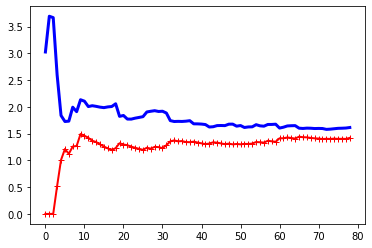

In [22]:
# 훈련세트는 샘플이 추가됨에 따라 에러가 증가
# 검증세트는 적은 수의 훈련 샘플로 훈련할때는 일반화가 제대로 되지 않아 오차가 크지만 점점 감소
# 과소적합. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있음
# 과소적합에서는 훈련샘플 추가해도 효과 없음. 더 복잡한 모델 사용하거나 더 나은 특성 선택해야함
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

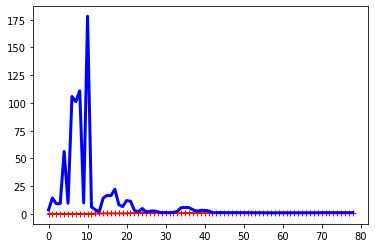

In [23]:
# 위와 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선
# 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
# 두 곡선 사이에 공간이 있음 (훈련데이터 모델 성능 > 검증데이터 모델 성능) -> 과대적합 모델의 특징
# 더 많음 훈련데이터 추가하면 개선 가능 
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
          ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
          ('lin_reg', LinearRegression()),

])
plot_learning_curves(polynomial_regression, X, y)

## 규제가 있는 선형 모델
- 선형 회귀 모델에서는 모델의 가중치를 제한해서 규제를 가함 
1. 릿지 회귀
  - 규제항$α\Sigma^n_{i=1}\theta ^2_i$ 이 비용함수에 추가
  - 모델의 가중치가 가능한 작게 유지되도록 함.
  - 훈련하는 동안에만 추가하고 평가할때는 규제 없이 함.

  - $α$의 역할: 모델을 얼마나 많이 규제할지. 0이면 선형 회귀와 같고 아주 큰 값이면 모든 가중치가 거의 0에 가까워져 데이터 평균을 지나게 됨. 즉 $α$ 커지면 모델 분산 줄지만 편향 커짐 
  - 비용함수: $J(θ)=MSE(θ)+α\frac{1}{2}Σ^n_{i=1}θ^2_i $
  - 스케일에 민감.

In [24]:
# 정규방정식을 사용한 릿지 회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.0795029]])

In [25]:
# 확률적 경사 하강법
sgd_reg = SGDRegressor(max_iter=5, penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


array([4.19706192])

2. 라쏘 회귀
- 노름의 제곱/2가 아닌 절대값노름을 더해줌
- $J(θ)=MSE(θ)+αΣ^n_{i=1}|θ| $
- 덜 중요한 특성의 가중치를 완전히 제거하려고 함. (가중치가 0이 됨) 
- 미분가능하지 않아서 경사 하강법에서 서브그래디언트 벡터 이용 

In [26]:
# 사이킷런 예제
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.03019231])

3. 엘라스틱넷
- 릿지와 라쏘 규제항의 가중합을 더해서 사용 
- $J(θ)=MSE(θ)+rαΣ^n_{i=1}|\theta_i|+\frac{1-r}{2}αΣ^n_{i=1}θ^2_i $
- r이 0 이면 릿지회귀, r이 1 이면 라쏘회귀
- 릿지가 기본이지만 실제로 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 나음
- 특성 수가 훈련 샘플수보다 많거나 특성 몇 개가 강하게 연관되어 있으면 라쏘보다 엘라스틱넷 선호

In [27]:
# 사이킷런 예제
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.02636901])

4. 조기 종료
- 검증 에러가 최솟값에 도달하면 훈련을 중지시킴

In [28]:
# 조기 종료 구현 코드
from sklearn.base import clone

# 데이터 준비
poly_scaler = Pipeline([
  ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
  ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start=True: fit() 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련 이어감 
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)

  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

NameError: ignored

## 로지스틱 회귀
- 분류에서도 사용할 수 있는 회귀 알고리즘
- 샘플이 특정 클래스에 속할 확률을 추정하는데 사용 가능
- 추정확률이 50% 넘으면 해당 클래스에 속하고 아니면 속하지 않는다고 예측 (이진 분류기)

1. 확률 추정
- 결과값의 로지스틱 출력 (로지스틱: 시그모이드 함수. $\sigma(t)=\frac{1}{1+exp(-t)}$)
- 확류루정 $\hat{p}=h_\theta(x)=σ(θ^T\cdot x)$
- 예측 $\hat{y}=0 (\hat{p}<0.5), 1(\hat{p}>=0.5)$
- 즉, $θ^T\cdot x$가 양수일때 1이라고 예측하고 음수일 때 0이라고 예측

2. 훈련과 비용 함수
- 하나의 훈련 샘플의 비용함수:
  - $c(\theta)=-log(\hat{p}) (y=1), -log(1-\hat{p}) (y=0)$
- 전체 훈련 세트의 비용함수(모든 훈련 샘플의 비용 평균):
  - $J(\theta )=-\frac{1}{m}Σ^m_{i=1}[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$ 
  - 정규방정식 같은 해는 없지만 볼록함수라서 경사 하강법으로 global minimum 찾을 수 있음
  - 편도함수: $\frac{∂}{∂θ_j}J(\theta )=\frac{1}{m}Σ^m_{i=1}(σ(θ^T\cdot x^{(i)})-y^{(i)})x_j^{(i)}$


3. 결정 경계


In [29]:
# 꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [30]:
X = iris['data'][:, 3:]
y = (iris['target']==2).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [31]:
from sklearn.linear_model import LogisticRegression
# 사이킷런은 l2 페널티를 기본으로 함 (파라미터 C. C가 높을수록 모델의 규제 줄어듬)
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X, y)

LogisticRegression(solver='liblinear')

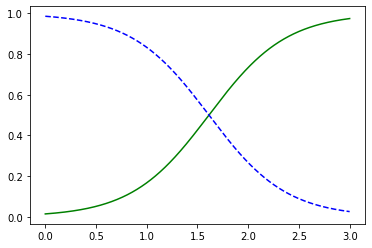

In [32]:
# 양쪽 확률이 똑같이 50%가 되는 곳에서 결정 경계가 만들어짐
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Iris-Virginica 아님')

In [33]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

4. 소프트맥스 회귀
- 다항 로지스틱 회귀. 직접 다중 클래스 지원
- 소프트맥스 회귀 모델이 샘플 x의 각 클래스 k에 대해 점수 s를 계산하고, 그 점수에 소프트맥스 함수 적용하여 각 클래스의 확률을 추정.
- $s_k(x)=(θ^{(k)})^T \cdot x$
- $\hat{p}_k=σ(s(x))_k=\frac{exp(s_k(x))}{Σ^K_{j=1}exp(s_j(x))}$
- K: 클래스 수
- 추정 확률이 가장 높은 클래스 선택
- 크로스 엔트로피 비용 함수 최소화하게 학습
  - 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제
  - $J(Θ)=-\frac{1}{m}Σ^m_{i=1}Σ^K_{k=1}y^{(i)}_klog(\hat{p}_k^{(i)})$
  - i번째 샘플의 타깃클래스가 k일 때, $y^{(i)}_k$는 1, 그 외는 0
  - 클래스가 2개일 때, 로지스틱 회귀의 비용함수와 같음 (로그 손실)
  - 그래디언트 벡터:$∇_{θ^{(k)}}  J(Θ)=\frac{1}{m}Σ^m_{i=1}(\hat{p}^{(i)}_k-y^{(i)}_k)x^{(i)}$


In [34]:
# 소프트맥스 회귀
# 붓꽃을 세 개의 클래스로 분류.
# Logistic Regression은 OvA 전략을 사용하지만 multi_class 매개변수를 'multinomial'로 바꾸면 소프트맥스 회귀
X = iris['data'][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris['target']
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [35]:
softmax_reg.predict([[5, 2]])

array([2])

In [37]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])